<a href="https://colab.research.google.com/github/leviathanaxeislit/ML_Lab/blob/main/WineData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load the data
wine_df = pd.read_csv('wine_data.csv')

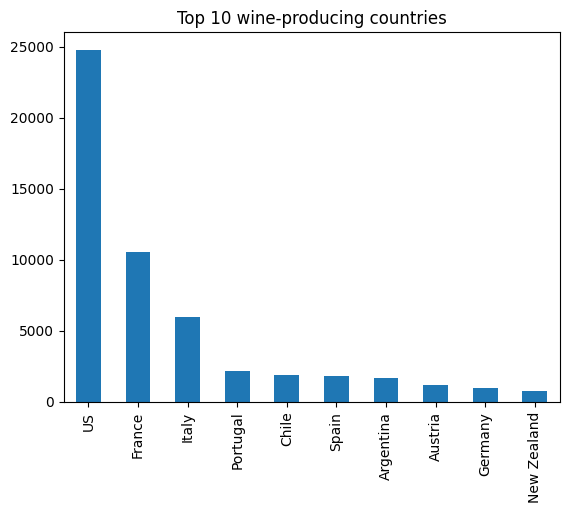

In [12]:
# Insight 1: Which country produces the most wines?
country_counts = wine_df['country'].value_counts().head(10)
country_counts.plot(kind='bar', title='Top 10 wine-producing countries')
plt.show()

In [13]:
# Insight 2: What is the most expensive wine?
most_expensive_wine = wine_df.loc[wine_df['price'].idxmax()]
print(f"The most expensive wine is  {most_expensive_wine['winery']} at ${most_expensive_wine['price']}")

The most expensive wine is  Château Pétrus at $2500.0


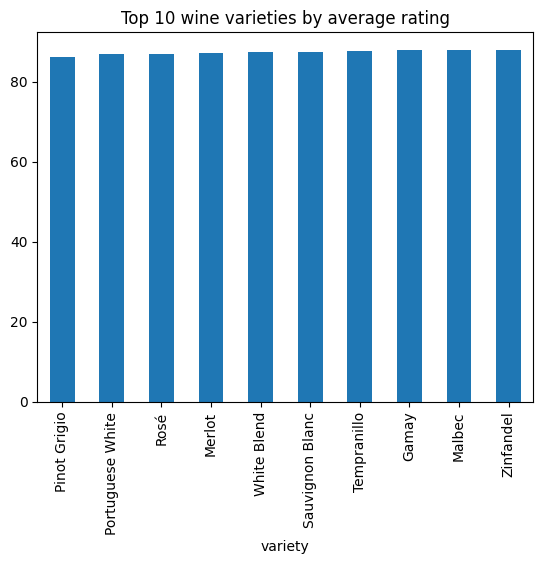

In [15]:
# Insight 3: Which variety of wine has the highest average rating?
variety_ratings = wine_df.groupby('variety')['points'].mean().sort_values(ascending=True).head(10)
variety_ratings.plot(kind='bar', title='Top 10 wine varieties by average rating')
plt.show()

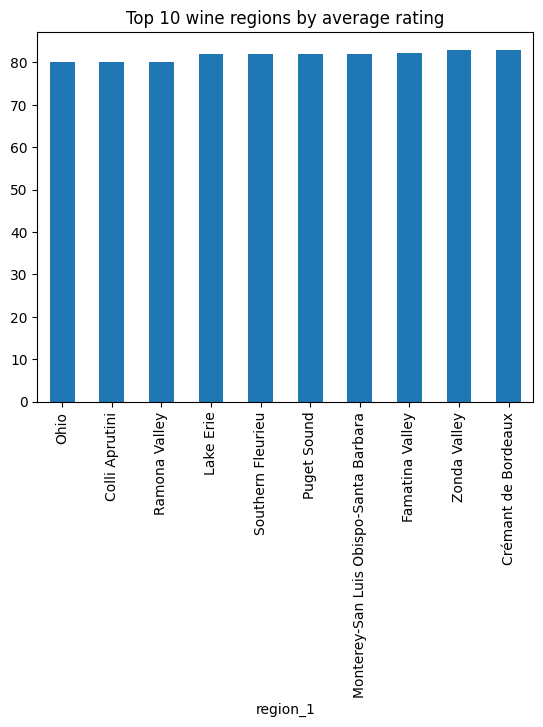

In [16]:
# Insight 4: Which region produces the highest-rated wines on average?
region_ratings = wine_df.groupby('region_1')['points'].mean().sort_values(ascending=True).head(10)
region_ratings.plot(kind='bar', title='Top 10 wine regions by average rating')
plt.show()

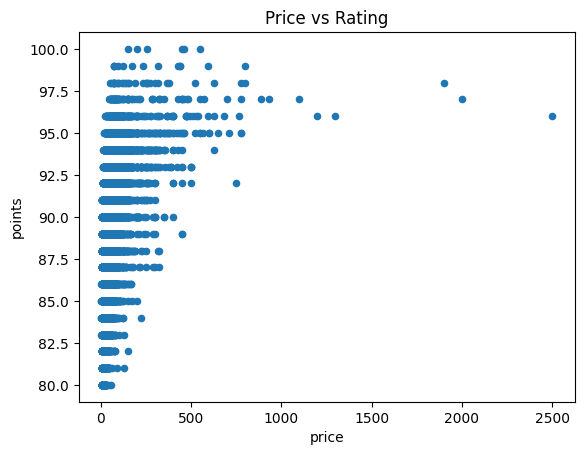

In [17]:
# Insight 5: Is there a relationship between price and rating?
wine_df.plot.scatter(x='price', y='points', title='Price vs Rating')
plt.show()

Accuracy: 0.4134501539190149


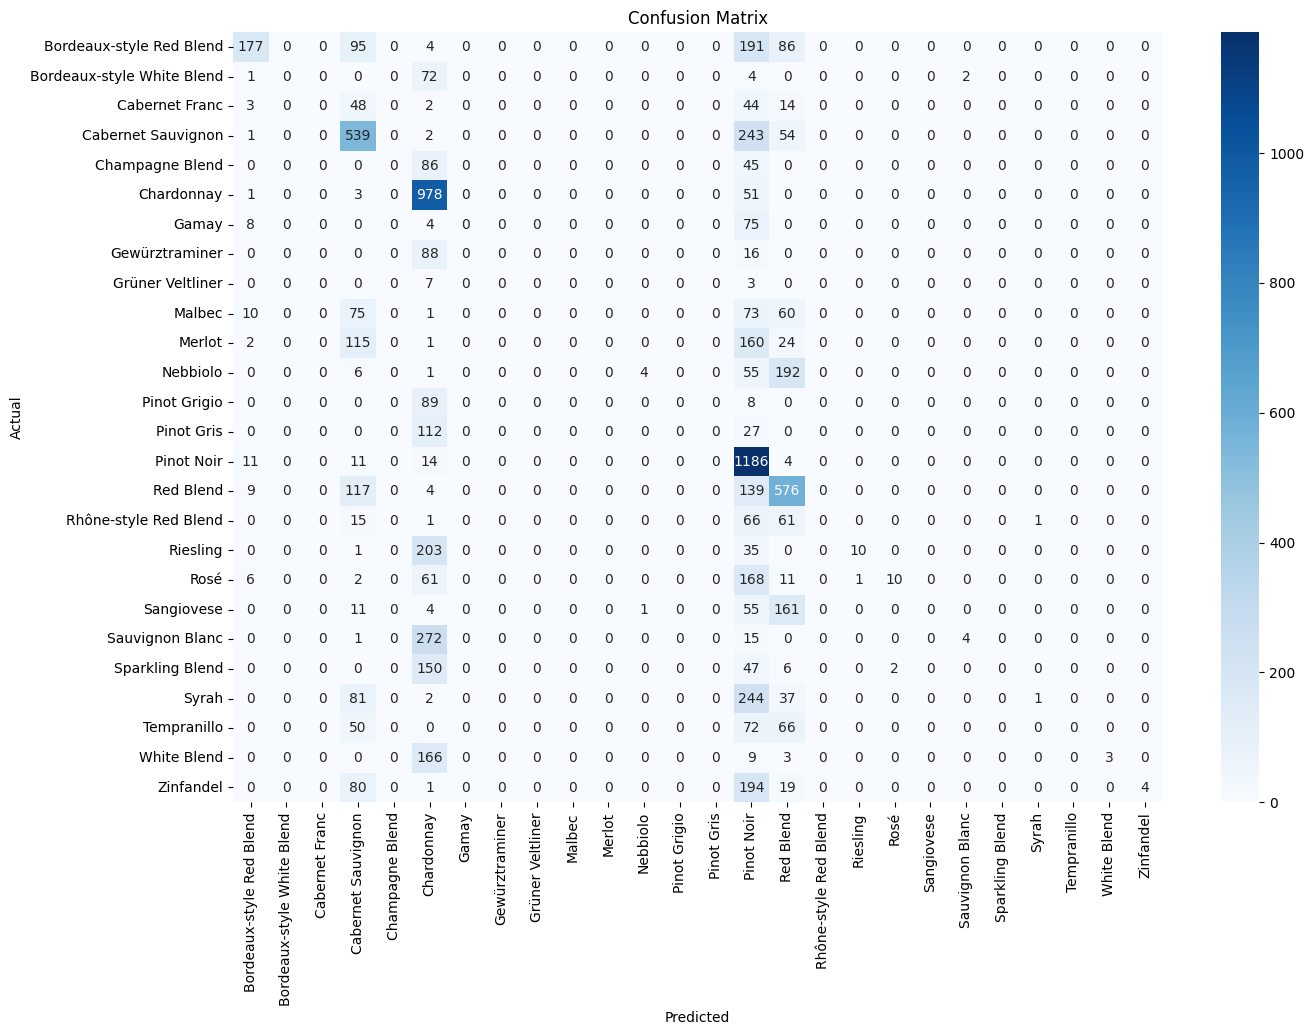

In [29]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the dataset
df = pd.read_csv('wine_data.csv')

# Drop irrelevant columns
df = df.drop(['user_name', 'designation', 'region_2'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Clean the review descriptions
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    stopwords = ['the', 'and', 'a', 'an', 'in', 'of', 'to', 'with', 'that', 'this', 'it', 'is', 'for']
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

df['clean_description'] = df['review_description'].apply(clean_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_description'], df['variety'], test_size=0.2, random_state=42)

# Convert text to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Make predictions on the testing set and evaluate the accuracy
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Save the model
import joblib
joblib.dump(clf, 'wine_variety_predictor.joblib')
joblib.dump(vectorizer, 'tfidf_transformer.joblib')

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [28]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('wine_data.csv')

# Drop irrelevant columns
df = df.drop(['user_name', 'designation', 'region_2'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Clean the review descriptions
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    stopwords = ['the', 'and', 'a', 'an', 'in', 'of', 'to', 'with', 'that', 'this', 'it', 'is', 'for']
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

df['clean_description'] = df['review_description'].apply(clean_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_description'], df['variety'], test_size=0.2, random_state=42)

# Convert text to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train multiple classifiers and compare their accuracies
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Linear SVC': LinearSVC()
}

for name, clf in classifiers.items():
    # Train the classifier and get cross-validation score
    clf.fit(X_train_vec, y_train)
    cv_score = cross_val_score(clf, X_train_vec, y_train, cv=5)
    print(f'{name} cross-validation score:', np.mean(cv_score))
    
    # Make predictions on the testing set and evaluate the accuracy
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy:', accuracy)


Naive Bayes cross-validation score: 0.400023754503038
Naive Bayes accuracy: 0.4134501539190149
Random Forest cross-validation score: 0.6122017313711816
Random Forest accuracy: 0.6230168126923987
Linear SVC cross-validation score: 0.6848412448270867
Linear SVC accuracy: 0.6862420080511484
